In [1]:
import pandas as pd # Data Visualization
import numpy as np # Numerical computations
from datetime import datetime # Working with date and time

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/HP/Documents/Volcanoe/USA Datasets/Kilauea_Volcanoe_2000_2024.csv")

### Data Cleaning

In [3]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing essential values
df.dropna(subset=['latitude', 'longitude', 'acq_date'], inplace=True)

# Convert acq_date to datetime
df['acq_date'] = pd.to_datetime(df['acq_date'], errors='coerce')

# Drop rows where date parsing failed
df.dropna(subset=['acq_date'], inplace=True)

# Rename column for consistency
df.rename(columns={'acq_date': 'eruption_date'}, inplace=True)

### Data Labeling

In [4]:
# Defining eruption periods
# Format: (start_date, end_date)
eruption_periods = [
    ("2024-12-23", "2025-08-01"),
    ("2024-09-15", "2024-09-20"),
    ("2024-06-03", "2024-06-03"),
    ("2021-09-29", "2023-06-16"),
    ("2020-12-20", "2021-05-23"),
    ("1983-01-03", "2018-09-05")  
]

# Convert periods to datetime
eruption_periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in eruption_periods]

# Function to check if date is in an eruption period
def is_eruption(date):
    for start, end in eruption_periods:
        if start <= date <= end:
            return 1
    return 0

# Apply function to create label
df['label'] = df['eruption_date'].apply(is_eruption)

### Saving labeled dataset

In [5]:
# Save preprocessed data as csv
df.to_csv("Labeled Kilauea Volcanoe Data.csv", index=False)

print("Preprocessing complete. Dataset saved as 'Labeled Kilauea Volcanoe Data.csv'")

Preprocessing complete. Dataset saved as 'Labeled Kilauea Volcanoe Data.csv'


### Dataset Chart

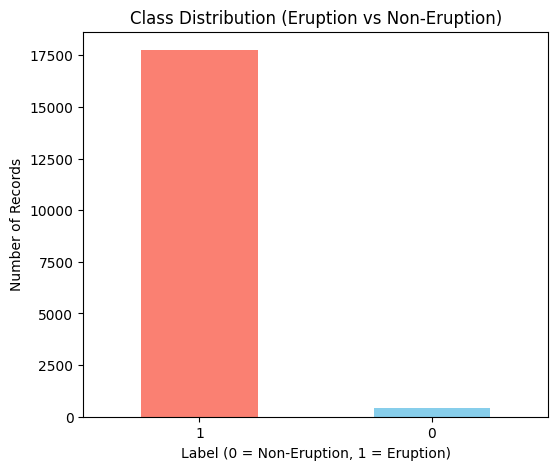

In [6]:
import matplotlib.pyplot as plt # Creating visualizations


# Bar Chart of Class Distribution
class_counts = df['label'].value_counts()

plt.figure(figsize=(6, 5))
class_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Class Distribution (Eruption vs Non-Eruption)")
plt.xlabel("Label (0 = Non-Eruption, 1 = Eruption)")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)
plt.show()